In [1]:
from torch.utils.data import DataLoader

from data.dataloader import aos_dataloader, get_aos_loaders
from data.dataset import AOSDataset
from utils import plot_dataset, plot_dataloader

In [2]:
G_SCENARIO = 1
G_DATSET_MAX_SIZE = None  # for speed we reduce the dataset size, enter None for all data.

# use small test set in the beginning to validate that the code is working.
G_TRAIN_SET_RATIO = 0.5
G_TEST_SET_RATIO = 1 - G_TRAIN_SET_RATIO
assert (G_TEST_SET_RATIO + G_TRAIN_SET_RATIO) <= 1.0, 'Test and Train set split invalid'

# choose data set location
G_DATASET_LOCATION = "../../data/aos-data/focalstack-1/20230912_part1"

#####################################
# Training settings
G_BATCH_SIZE = 128
G_LEARNING_RATE = 0.001

In [3]:
dataset = AOSDataset(
    G_DATASET_LOCATION,
    relative_path=True,
    maximum_datasize=G_DATSET_MAX_SIZE
)

print(dataset.__len__())

5362


In [4]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [5]:
feature, label = next(iter(dataloader))
print(feature.shape)
print(label.shape)

torch.Size([1, 3, 512, 512])
torch.Size([1, 1, 512, 512])


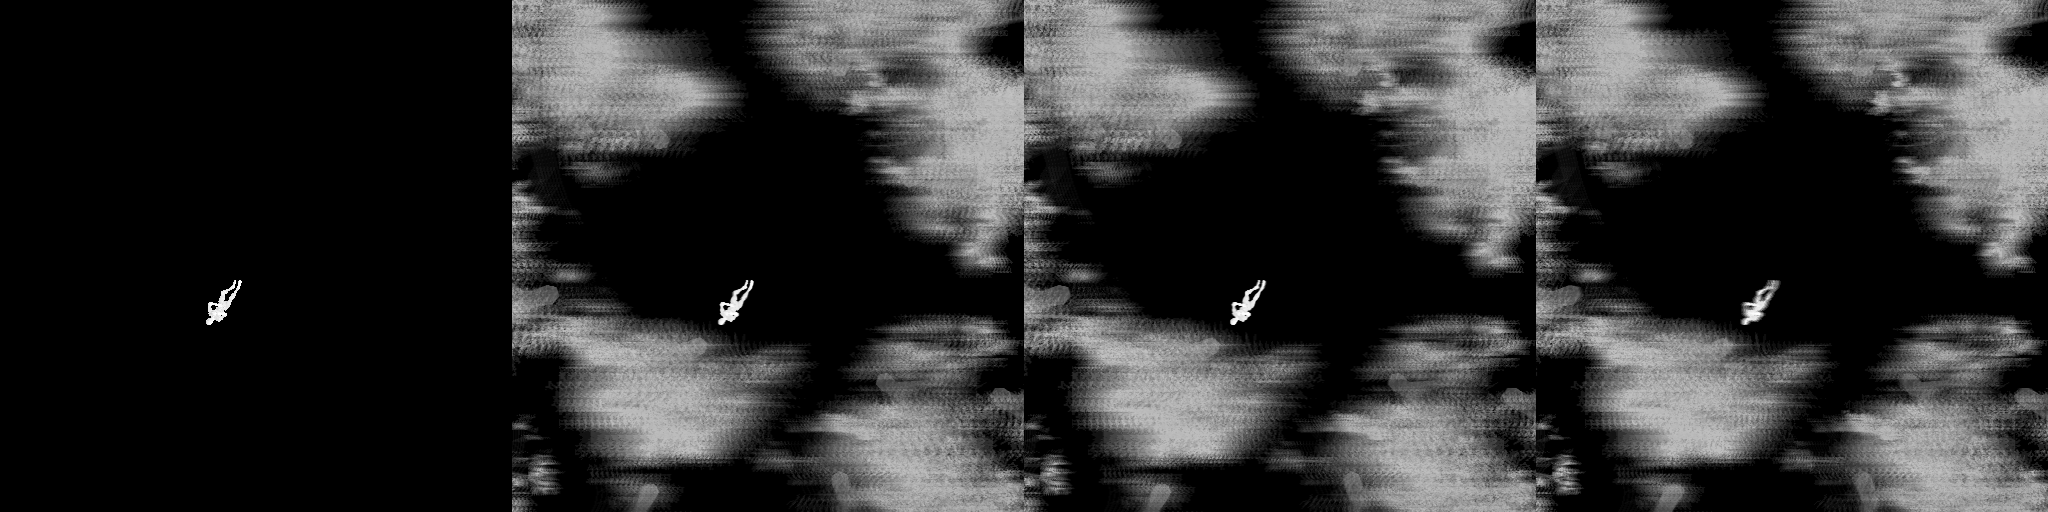

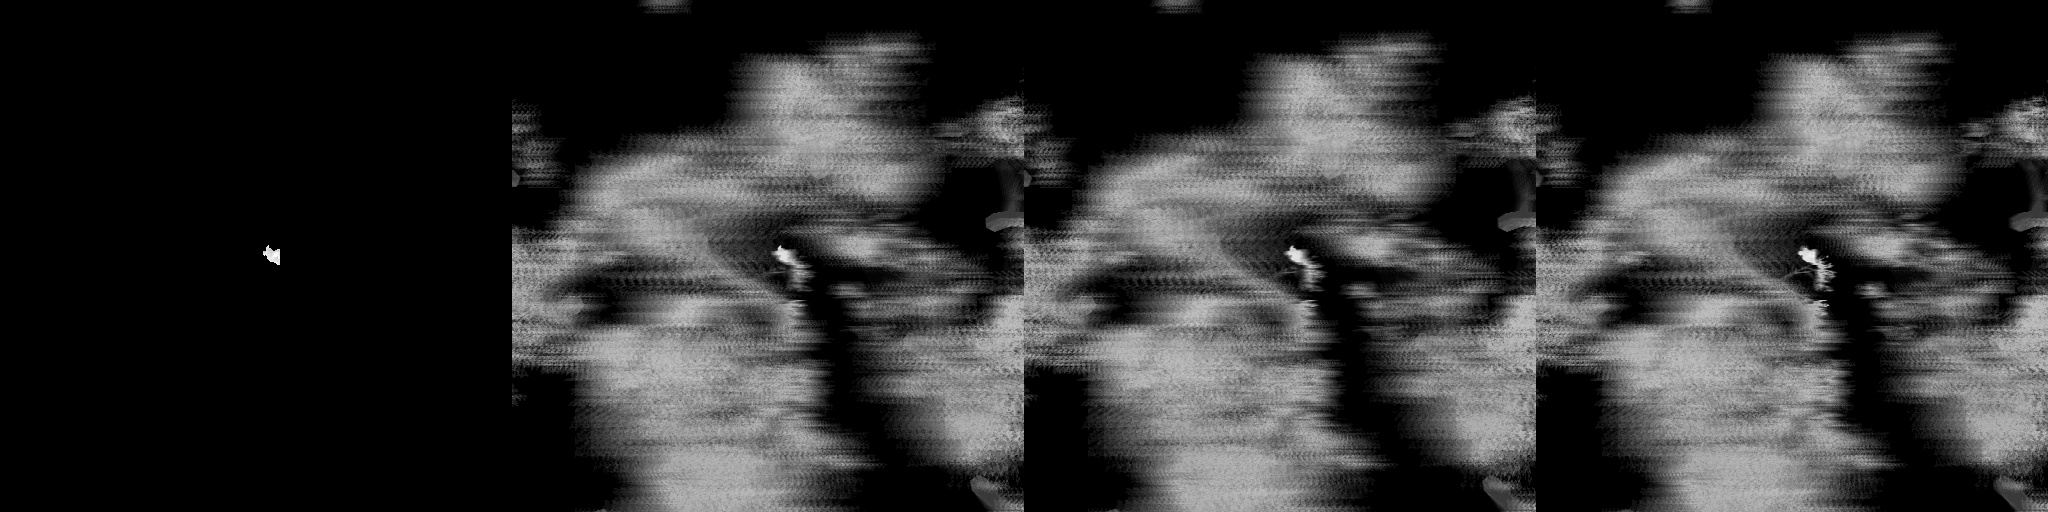

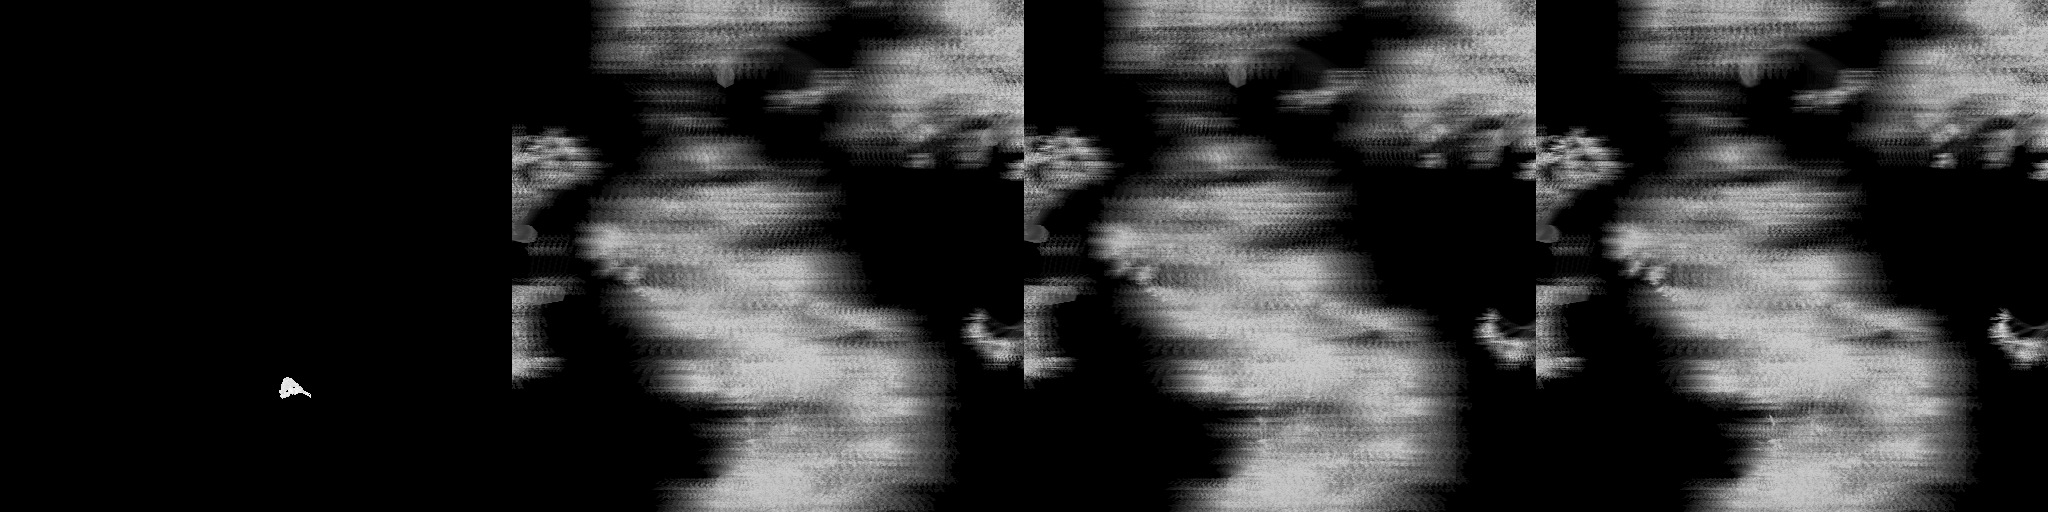

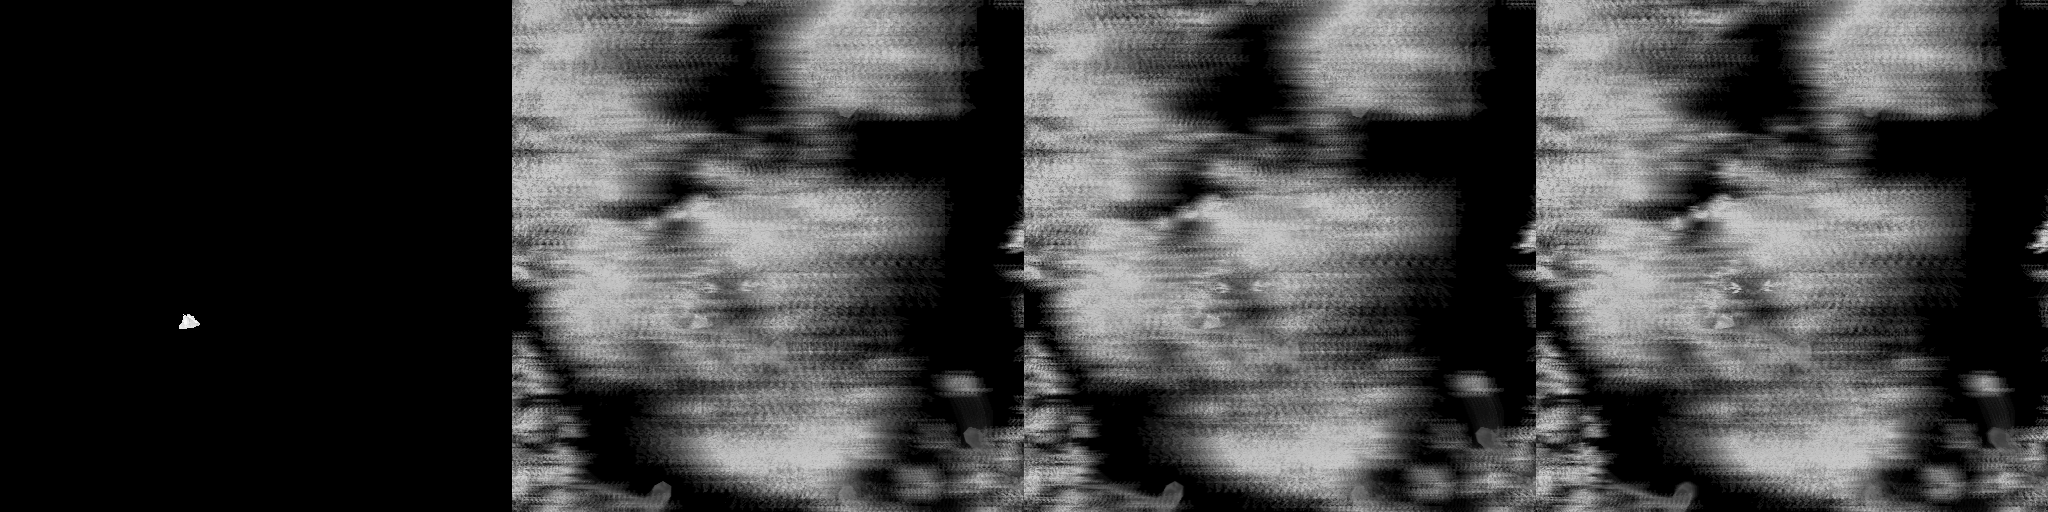

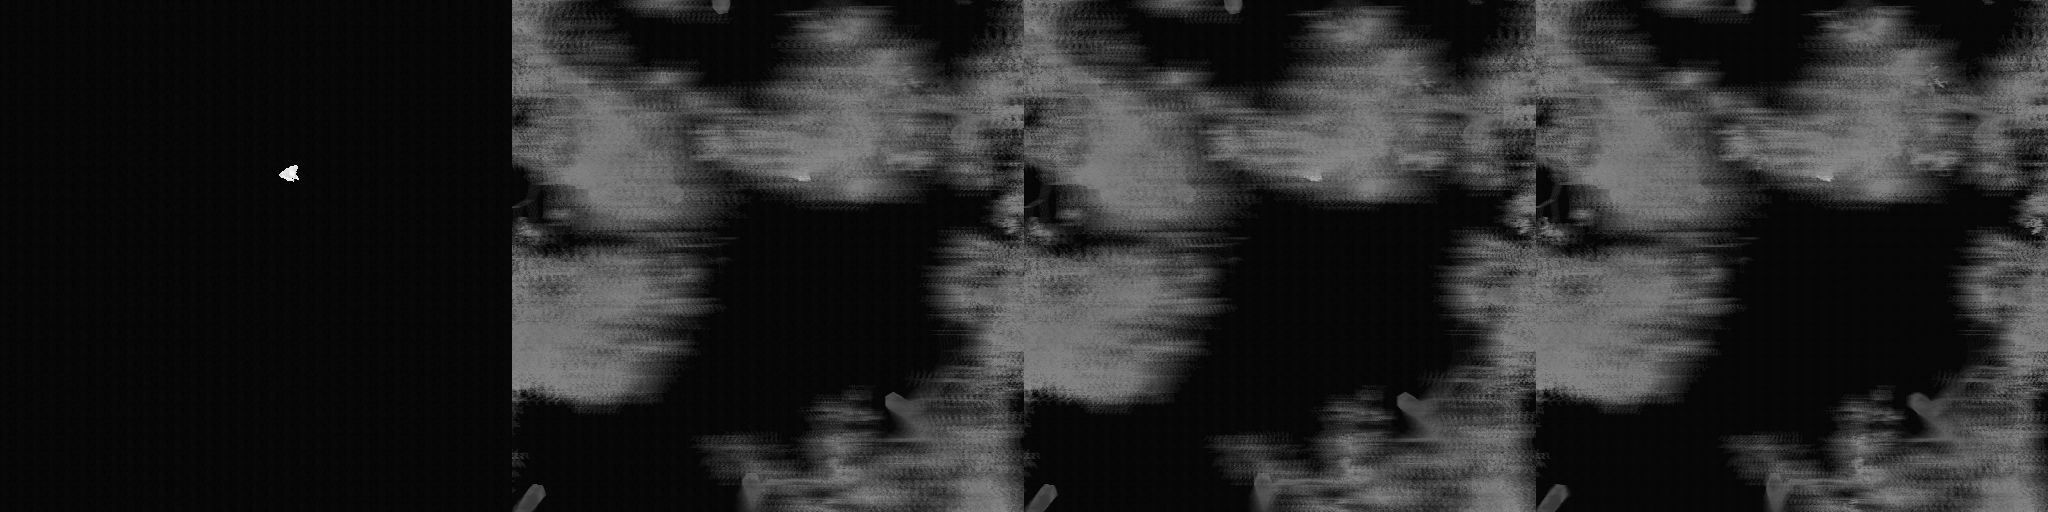

In [6]:
plot_dataset(dataset, n_images=5)

In [7]:
train_loader, test_loader = aos_dataloader(dataset, train_ratio=0.9)

In [8]:
train_loader, test_loader = get_aos_loaders(
    train_ratio=0.5,
    train_batch_size=1,
    test_batch_size=1,
    shuffle=False,
    patch_size=[100, 100],
    dataset_folder=G_DATASET_LOCATION
)

In [9]:
feature, label = next(iter(train_loader))
print(feature.shape)
print(label.shape)

torch.Size([1, 3, 100, 100])
torch.Size([1, 1, 100, 100])


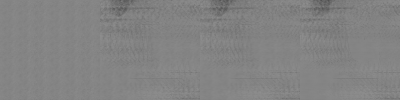

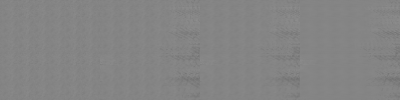

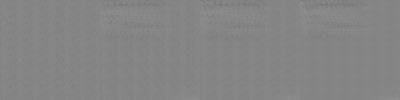

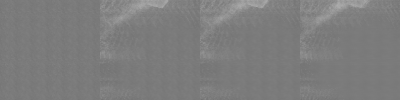

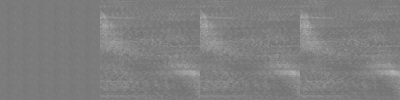

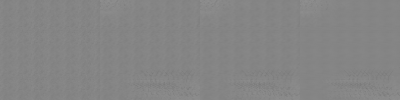

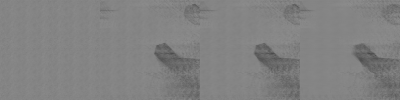

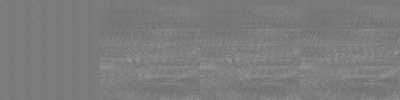

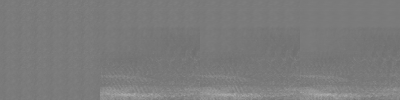

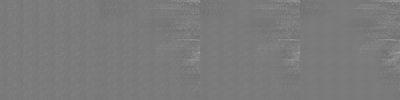

In [10]:
plot_dataloader(train_loader, n_images=10)